Write a colab pytorch from scratch - 3 layer deep neural network for non linear regression withotu using pytorch builtin layer functionality 

In [ ]:
import torch
import matplotlib.pyplot as plt
import math 

In [ ]:
class MSE:
  def __call__(self, y_pred, y_true):
    # Calculating MSE
    self.y_pred = y_pred
    self.y_true = y_true
    return ((y_pred - y_true) ** 2).mean()

  def backward(self):
    # Derivative of MSE
    n = self.y_true.shape[0]
    self.gradient = 2. * (self.y_pred - self.y_true) / n
    return self.gradient


class Linear:
  def __init__(self, input_dim: int, num_hidden: int = 1):
    # initalizing weights and bias
    self.weights = torch.randn(input_dim,num_hidden) * math.sqrt(2. / input_dim)
    self.bias = torch.zeros(num_hidden)
    print(self.weights.size(), self.bias.size())
  
  def __call__(self, x):
    # Forward Propagation
    self.x = x
    output = x @ self.weights + self.bias
    return output

  def backward(self, gradient):
    # Back Propagation
    self.weights_gradient = self.x.T @ gradient
    self.bias_gradient = gradient.sum(axis=0)
    self.x_gradient = gradient @ self.weights.T
    return self.x_gradient

  def update(self, lr):
    # Updating Weights and Bias
    self.weights = self.weights - lr * self.weights_gradient
    self.bias = self.bias - lr * self.bias_gradient

In [ ]:
from typing import Callable

def fit(x: torch.tensor, y: torch.tensor, model: Callable, loss: Callable, lr: float, num_epochs: int):
  for epoch in range(num_epochs):
    y_pred = model(x)
    loss_value = loss(y_pred, y)
    print(f'Epoch {epoch}, loss {loss_value}')
    gradient_from_loss = loss.backward()
    model.backward(gradient_from_loss)
    model.update(lr)


In [ ]:
n = 200
d = 3
x = torch.rand(n,d)

weights_true = torch.tensor(([5, 1,1],[1,1,1]),dtype=torch.float).T
weights_true
bias_true = torch.tensor(([1]))

y_true = (x ** 2) @ weights_true + x @ weights_true + bias_true
print(f'x: {x.shape}, weights: {weights_true.shape}, bias: {bias_true.shape}, y: {y_true.shape}')

x: torch.Size([200, 3]), weights: torch.Size([3, 2]), bias: torch.Size([1]), y: torch.Size([200, 2])


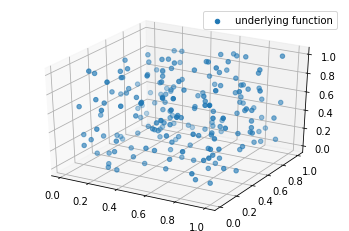

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_3d(x, y, y_pred=None):
  fig = plt.figure()
  ax = fig.add_subplot(111, projection='3d')
  ax.scatter(x[:, 0], x[:, 1], x[:, 2], y, label='underlying function')
  if y_pred is not None:
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], y_pred, label='our function')
  plt.legend()

plot_3d(x, y_true)

Add non-linearity:ReLU

In [ ]:
class Relu:
    def __call__(self, input_):
        self.input_ = input_
        self.output = torch.clamp(self.input_, 0, None)
        return self.output
    
    def backward(self, output_gradient):
      # import pdb; pdb.set_trace()  # By the way, this is how you can debug
      self.input_gradient = (self.input_ > 0) * output_gradient
      return self.input_gradient

Train new non-linear model

In [ ]:
class Model:
  def __init__(self, input_dim, num_hidden):
    self.linear1 = Linear(input_dim, num_hidden)
    self.relu1 = Relu()
    self.linear2 = Linear(num_hidden, 2)
    self.relu2 = Relu()
    self.linear3 = Linear(2,2)

  
  def __call__(self, x):
    l1 = self.linear1(x)
    r1 = self.relu1(l1)
    l2 = self.linear2(r1)
    r2 = self.relu2(l2)
    l3 = self.linear3(r2)
    return l3
  
  def backward(self, output_gradient):
    print(output_gradient.shape)
    linear3_gradient = self.linear3.backward(output_gradient)
    relu2_gradient = self.relu2.backward(linear3_gradient)
    linear2_gradient = self.linear2.backward(relu2_gradient)
    relu1_gradient = self.relu1.backward(linear2_gradient)
    linear1_gradient = self.linear1.backward(relu1_gradient)
    print('Model backward', linear3_gradient.shape, relu2_gradient.shape, linear2_gradient.shape, relu1_gradient.shape, linear1_gradient.shape)
    # import pdb; pdb.set_trace()
    return linear1_gradient

  def update(self, lr):
    self.linear3.update(lr)
    self.linear2.update(lr)
    self.linear1.update(lr)

test forward and backward steps

In [ ]:
loss = MSE()
model = Model(d, 10)

torch.Size([3, 10]) torch.Size([10])
torch.Size([10, 2]) torch.Size([2])
torch.Size([2, 2]) torch.Size([2])


fit the model

In [ ]:
fit(x, y_true, model=model, loss=loss, lr=0.05, num_epochs=40)


Epoch 0, loss 37.350040435791016
torch.Size([200, 2])
Model backward torch.Size([200, 2]) torch.Size([200, 2]) torch.Size([200, 10]) torch.Size([200, 10]) torch.Size([200, 3])
Epoch 1, loss 30.263566970825195
torch.Size([200, 2])
Model backward torch.Size([200, 2]) torch.Size([200, 2]) torch.Size([200, 10]) torch.Size([200, 10]) torch.Size([200, 3])
Epoch 2, loss 25.52203941345215
torch.Size([200, 2])
Model backward torch.Size([200, 2]) torch.Size([200, 2]) torch.Size([200, 10]) torch.Size([200, 10]) torch.Size([200, 3])
Epoch 3, loss 21.68146324157715
torch.Size([200, 2])
Model backward torch.Size([200, 2]) torch.Size([200, 2]) torch.Size([200, 10]) torch.Size([200, 10]) torch.Size([200, 3])
Epoch 4, loss 18.570573806762695
torch.Size([200, 2])
Model backward torch.Size([200, 2]) torch.Size([200, 2]) torch.Size([200, 10]) torch.Size([200, 10]) torch.Size([200, 3])
Epoch 5, loss 16.050622940063477
torch.Size([200, 2])
Model backward torch.Size([200, 2]) torch.Size([200, 2]) torch.Size(

plot the predicted values in 3D plot

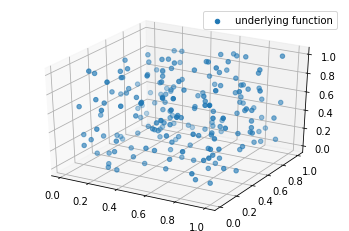

In [ ]:
y_pred = model(x)
plot_3d(x,y_pred)